# Surviving The Titanic
### *Survival of the Fittest...or Richest?*

On April 15<sup>th</sup>, 1915 one of the largest passenger liners of the time named *The Titanic* crashed into an iceberg. With ill-prepared safety procedures and a lack of lifeboats, nearly 70% of the passengers on the ship died.<sup>1</sup> Tragically, [Jack Dawson](http://jamescameronstitanic.wikia.com/wiki/Jack_Dawson) died (somewhat controversially), although [Rose](http://jamescameronstitanic.wikia.com/wiki/Rose_DeWitt_Bukater) was able to survive.

However, though the event was tragic, one wonders what stories the 30% that survived can tell. And, from a data analyst perspective, one asks the question: *Who* survived? Were people more likely to survive because of factors outside of chance? Specifically, in this analysis using the [Kaggle Titanic data](https://www.kaggle.com/c/titanic/data), the following questions are considered:
1. Does a higher *Ticket Class* mean that a passenger had a better chance to survive on the ship?
2. How did demographics differ between those that survived and did not survive?

## Exploratory Data Analysis

The Titanic dataset for this project comes from [Kaggle](https://www.kaggle.com/c/titanic/data), a website dedicated to machine learning projects. In the description of the data, Kaggle lists that the datset has 10 primary variables corresponding to demographic and passenger-class information about each passenger.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

titanic = pd.read_csv('titanic-data.csv', sep=',')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


An initial browse through the data indicates a few things:

- There seem to be quite a few missing values for Age, as in the description the counts for *Age* are much less than the other variables.
- The *Fare* seems to be skewed right due to the median being much less than the mean (even the 75% quantile is less than the mean).
- Survival on the ship was about 38% according to the data, slightly higher than the Wikipedia survival rate (1 = survived, 0 = died, and the mean indicates survival rate for *Survived*)

Based on the differences in counts between *Age* and the other variables, it is best practice to determine the amount of missingness across all of the data in the dataset.

In [4]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


This confirms that there are quite a few missing values for cabin and age and other variables have most of the data present. 

To get a better visual understanding of the distribution of fare rates, a histogram is also shown below of fare rates. This will help us confirm our suscipicion that the average fare rate is driven up by outlying fares.

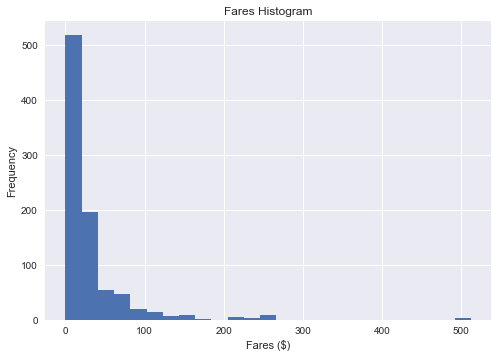

In [5]:
fares = titanic['Fare']
titanic['Pclass'].astype('category')
titanic['Survived'].astype('category')
plt.title('Fares Histogram')
plt.xlabel('Fares ($)')
plt.ylabel('Frequency')
plt.hist(fares, bins = 25)
plt.show()


This plot confirms that the fares are skewed right.

## Q1: Ticket Class vs. Survival

Throughout history, wealth has brought with it a plethora of other benefits: resources, power, influence, and more. This analysis seeks to understand whether more wealth generates a higher probability of survival.

Below, a person's fares that they paid for a ticket is plotted against whether or not they survived (1 = survival, 0 = death). 

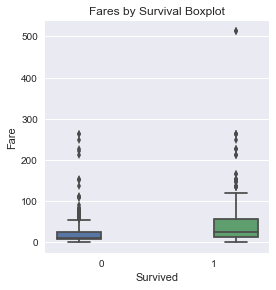

In [6]:
sns.factorplot(x = 'Survived', y = 'Fare', hue = 'Survived', kind = 'box', data = titanic)
plt.title('Fares by Survival Boxplot')
plt.show()

The graph seems to offer a slight indication higher initial fare rates (and thus, ticket classes) were associated with better chances of survival.

Another way to go about analyzing this would be to compare the proportion of people that are within each ticket class at the start, and the proportion of people within each ticket class that survived. If not all groups had similar survival rates, than differences can be correlated back to the original group they were in.

In [7]:
surv_class = titanic[['Pclass', 'Survived']].groupby('Pclass')

# divide the number of people within each class by the total (sum) of people on board
# initial proportion of ticket holders by class
print(surv_class['Pclass'].count()/surv_class['Pclass'].count().sum())

# survival of each ticket holder by class
print(surv_class.mean())

Pclass
1    0.242424
2    0.206510
3    0.551066
Name: Pclass, dtype: float64
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


The stark differences observed in survival rates across groups give a higher level of confidence to the hypothesis that initial ticket class played a role in who survived and did not survive. However, more rigorous statistical analyses would be needed to solidify the alternative hypothesis.

## Q2: Who Were They?

Another component of identifying **who** survived is looking into the demographics associated with the persons who survived and did not survive. For starters, this analysis asks: Where did they come from?

In [8]:
titanic.groupby('Embarked').count()['PassengerId']

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

The majority of passengers came from Southampton (S), followed by Cherbourg (C) and finally Queenstown (Q). In breaking it down further:

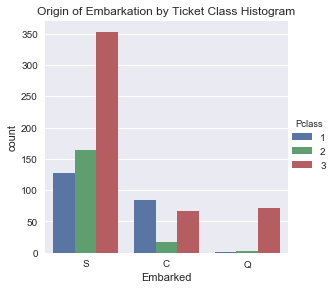

In [9]:
sns.factorplot(x = 'Embarked', hue = 'Pclass', kind = 'count', data = titanic)
plt.title('Origin of Embarkation by Ticket Class Histogram')
plt.show()

The above plot indicates that Cherbourg had the highest proportion  of their population in the 1st class, while Queenstown had nearly all of its population in 3rd class.

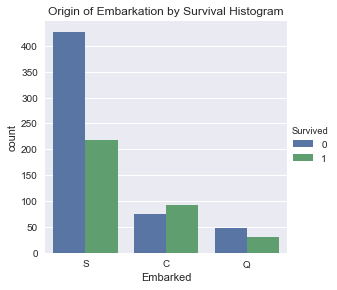

In [10]:
sns.factorplot(x = 'Embarked', hue = 'Survived', kind = 'count', data = titanic)
plt.title('Origin of Embarkation by Survival Histogram')
plt.show()

In looking at the breakdown of surivors by point of embarkation, we see a that larger proportions of people from Cherbourg survived (The richer embarkation point) than others. However, seeing that nearly all of the persons from Queenstown were 3rd class, the proportion that survived seems slightly higher than a 24% chance of survival afforded to those in 3rd class from Q1. Therefore, sex statistics are broken down to examine how that could have played a role in chances of survival.

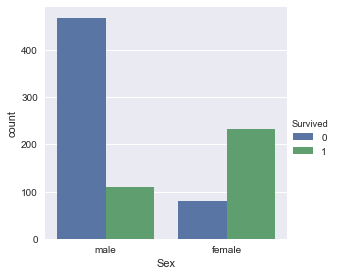

In [11]:
sns.factorplot(x = 'Sex', hue = 'Survived', kind = 'count', data = titanic)
plt.show()

This plot points to females had a higher rate of survival than males for the crash. We can make this intuition more statistically valid by performing a chi-squared test between survival rates for males and females.

In [78]:
from scipy.stats import chisquare

# counts for who survived by sex, put in array form
actual_survival_counts = titanic.groupby(['Sex', 'Survived']).count()['PassengerId']

# convert to array; array formatted up as [F:died, F:survived, M:died, M:survived]
actual_survival_counts = np.array(actual_survival_counts)

# expected survival would be that where survival between both groups is equal (i.e. mean of Survived)
expected_survival_rate = titanic['Survived'].mean()
gender_count = titanic.groupby('Sex').count()['PassengerId']
expected_survived = (gender_count * expected_survival_rate).astype(int)
expected_died = gender_count - expected_survived

# convert to array and above format
expected_survival_counts = np.array([expected_died[0], expected_survived[0], expected_died[1], expected_survived[1]])

# perform chi-squared test
chisquare(actual_survival_counts, expected_survival_counts)

Power_divergenceResult(statistic=264.22405701385424, pvalue=5.4832203048658722e-57)

The result from the chi-squared statistical test between the sexes indicates that there exists a statistically significant survival difference between the sexes.

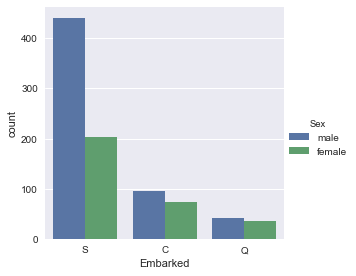

In [19]:
sns.factorplot(x = 'Embarked', hue = 'Sex', kind = 'count', data = titanic)
plt.show()

In going back to our embarkation plot (this time broken out by gender), we find that Queenstown had a higher proportion of females as its passengers than Southampton, giving us a greater understanding of why the survival rates between Queenstown and Southampton were slightly different than expected based strictly on ticket class.

## Conclusion

This analysis gives a general indication that higher, more expensive ticket classes led to greater chances of survival. However, more advanced statistical tests will be necessary to give full statistical significance to our inital results on survival and ticket class.

In relation to *who* the survivors were, this analysis examined the demographic factors of point of embarkation and sex. It was found that females had a statistically significant greater survival rate than males. In addition, there seemed to be disparities in survival rates across origins of embarkation, with the origins with more 1st class ticket holders (Cherbourg) and more women (Queenstown) more likely to survive than others (Southampton). However, a deeper dive into the differences across points of embarkation would lead to more confidence in the inferences made here.

Overall, it seems that higher-class folks and women were more likely to survive the Titanic crash. Although somewhat sobering to know that wealth can buy you a higher chance to survive, the biggest lesson to takeaway may be to not crash into icebergs when carrying large amounts of people, or any people at all for that matter. 

## References

<sup>1</sup>[Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic)